Dataset: Yahoo Account Users' Movie Ratings:

Overview: The dataset is made up of information from Yahoo users who rated certain movies from their Yahoo accounts. Available data that we will use for our analysis include: movie ID, movie title, movie year of release, Yahoo movie ratings, Movie Mom movie ratings, rater gender, and rater year of birth.

Analysis 1A will analyze the correlation between the Yahoo movie ratings, the critic ratings, and the Movie Mom movie ratings, which is a different forum that allows users to rate movies. 

Analysis 1B will analayze the movies' year of release to discover which year that the most postively rated movies. 

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

rater = pd.read_csv('ydata-ymovies-user-demographics-v1_0.csv', header = None, index_col=False, infer_datetime_format=True)
rating = pd.read_csv('ydata-ymovies-user-movie-ratings-train-v1_0.csv', header = None, index_col=False, infer_datetime_format=True)

In [2]:
data = pd.read_csv('ydata-ymovies-movie-content-descr-v1_0.csv', header = None, encoding = "ISO-8859-1",index_col=False, infer_datetime_format=True)

In [4]:
data.shape

(106959, 34)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1800010969,The 1985 Admiral's Cup (1997),Small boats vs. big winds in this the official...,\N,\N,\N,NaN,\N,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1800011786,984 - Prisoner of the Future (1984),"984, a man of the future, is imprisoned withou...",\N,\N,\N,NaN,\N,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1800011850,A's All-Star Almanac (1987),Seen here are great moments from All-Star Game...,\N,\N,\N,NaN,\N,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,3.034066075,7,1
3,1800012991,The Adventures of Annie Oakley (1953),"Two great episodes of this western series. ""An...",\N,\N,\N,NaN,\N,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,2.743485208,6,1
4,1800013061,The Adventures of Black Beauty 1 (1972),The Fugitive introduces the story of the once ...,\N,\N,\N,NaN,\N,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [14]:
data1 = data[[0, 1, 6, 10, 18, 20, 21, 24, 32, 33]]
#the columns that we will be focusing on for our analysis from this dataset

In [15]:
data1.columns = ['ID', 'Title', 'Release Date', 'Genres', 'Avg. Critic Ratings', '# of Awards won', '# of awards nomination', 'Movie Mom Rating', 'Avg. Training Rating', '# of User Ratings']

In [368]:
data1.head()

,ID,Title,Release Date,Genres,Avg. Critic Ratings,# of Awards won,# of awards nomination,Movie Mom Rating,Avg. Training Rating,# of User Ratings
0,1800010969,The 1985 Admiral's Cup (1997),NaN,Special Interest,\N,\N,\N,\N,\N,\N
1,1800011786,984 - Prisoner of the Future (1984),NaN,Science Fiction/Fantasy,\N,\N,\N,\N,\N,\N
2,1800011850,A's All-Star Almanac (1987),NaN,Special Interest,\N,\N,\N,\N,7,1
3,1800012991,The Adventures of Annie Oakley (1953),NaN,Western,\N,\N,\N,\N,6,1
4,1800013061,The Adventures of Black Beauty 1 (1972),NaN,Kids/Family,\N,\N,\N,\N,\N,\N


1A:

1. What is the most popular genre?
2. How do the different forums rate on the genres?

In [9]:
#Segmenting data by genres
genres = data1.Genres.apply(lambda x: pd.value_counts(x.split("|"))).sum(axis=0)
genreplot = genres.to_frame()
genreplot.columns = ["Number of Movies"]
genreplot.sort_values(by = 'Number of Movies', ascending=False, inplace=True)
ranking = genreplot
ranking

,Number of Movies
\N,"47,453.00"
Special Interest,"16,669.00"
Drama,"8,809.00"
Comedy,"6,922.00"
Musical/Performing Arts,"5,669.00"
Action/Adventure,"5,276.00"
Kids/Family,"5,258.00"
Art/Foreign,"4,356.00"
Suspense/Horror,"3,104.00"
Science Fiction/Fantasy,"2,326.00"


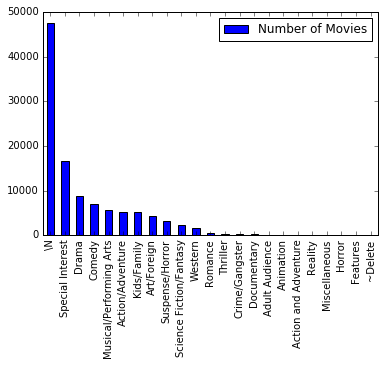

In [10]:
ranking.plot.bar()
#Drop the N if we want to compare the rated genres

In [340]:
newranking = ranking.ix[1:]
newranking

,Number of Movies
Special Interest,"16,669.00"
Drama,"8,809.00"
Comedy,"6,922.00"
Musical/Performing Arts,"5,669.00"
Action/Adventure,"5,276.00"
Kids/Family,"5,258.00"
Art/Foreign,"4,356.00"
Suspense/Horror,"3,104.00"
Science Fiction/Fantasy,"2,326.00"
Western,"1,676.00"


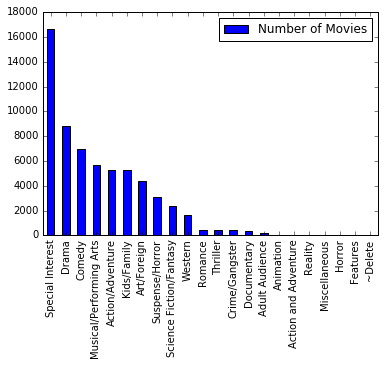

In [342]:
newranking.plot.bar()

The largest number of recorded genre is: special interest. 
The second largest number of recorded genre is: drama. 

The least recorded genres are (tied):
1. Action and Adventure
2. Reality
3. Horror
4. Miscellaneous
5. Features

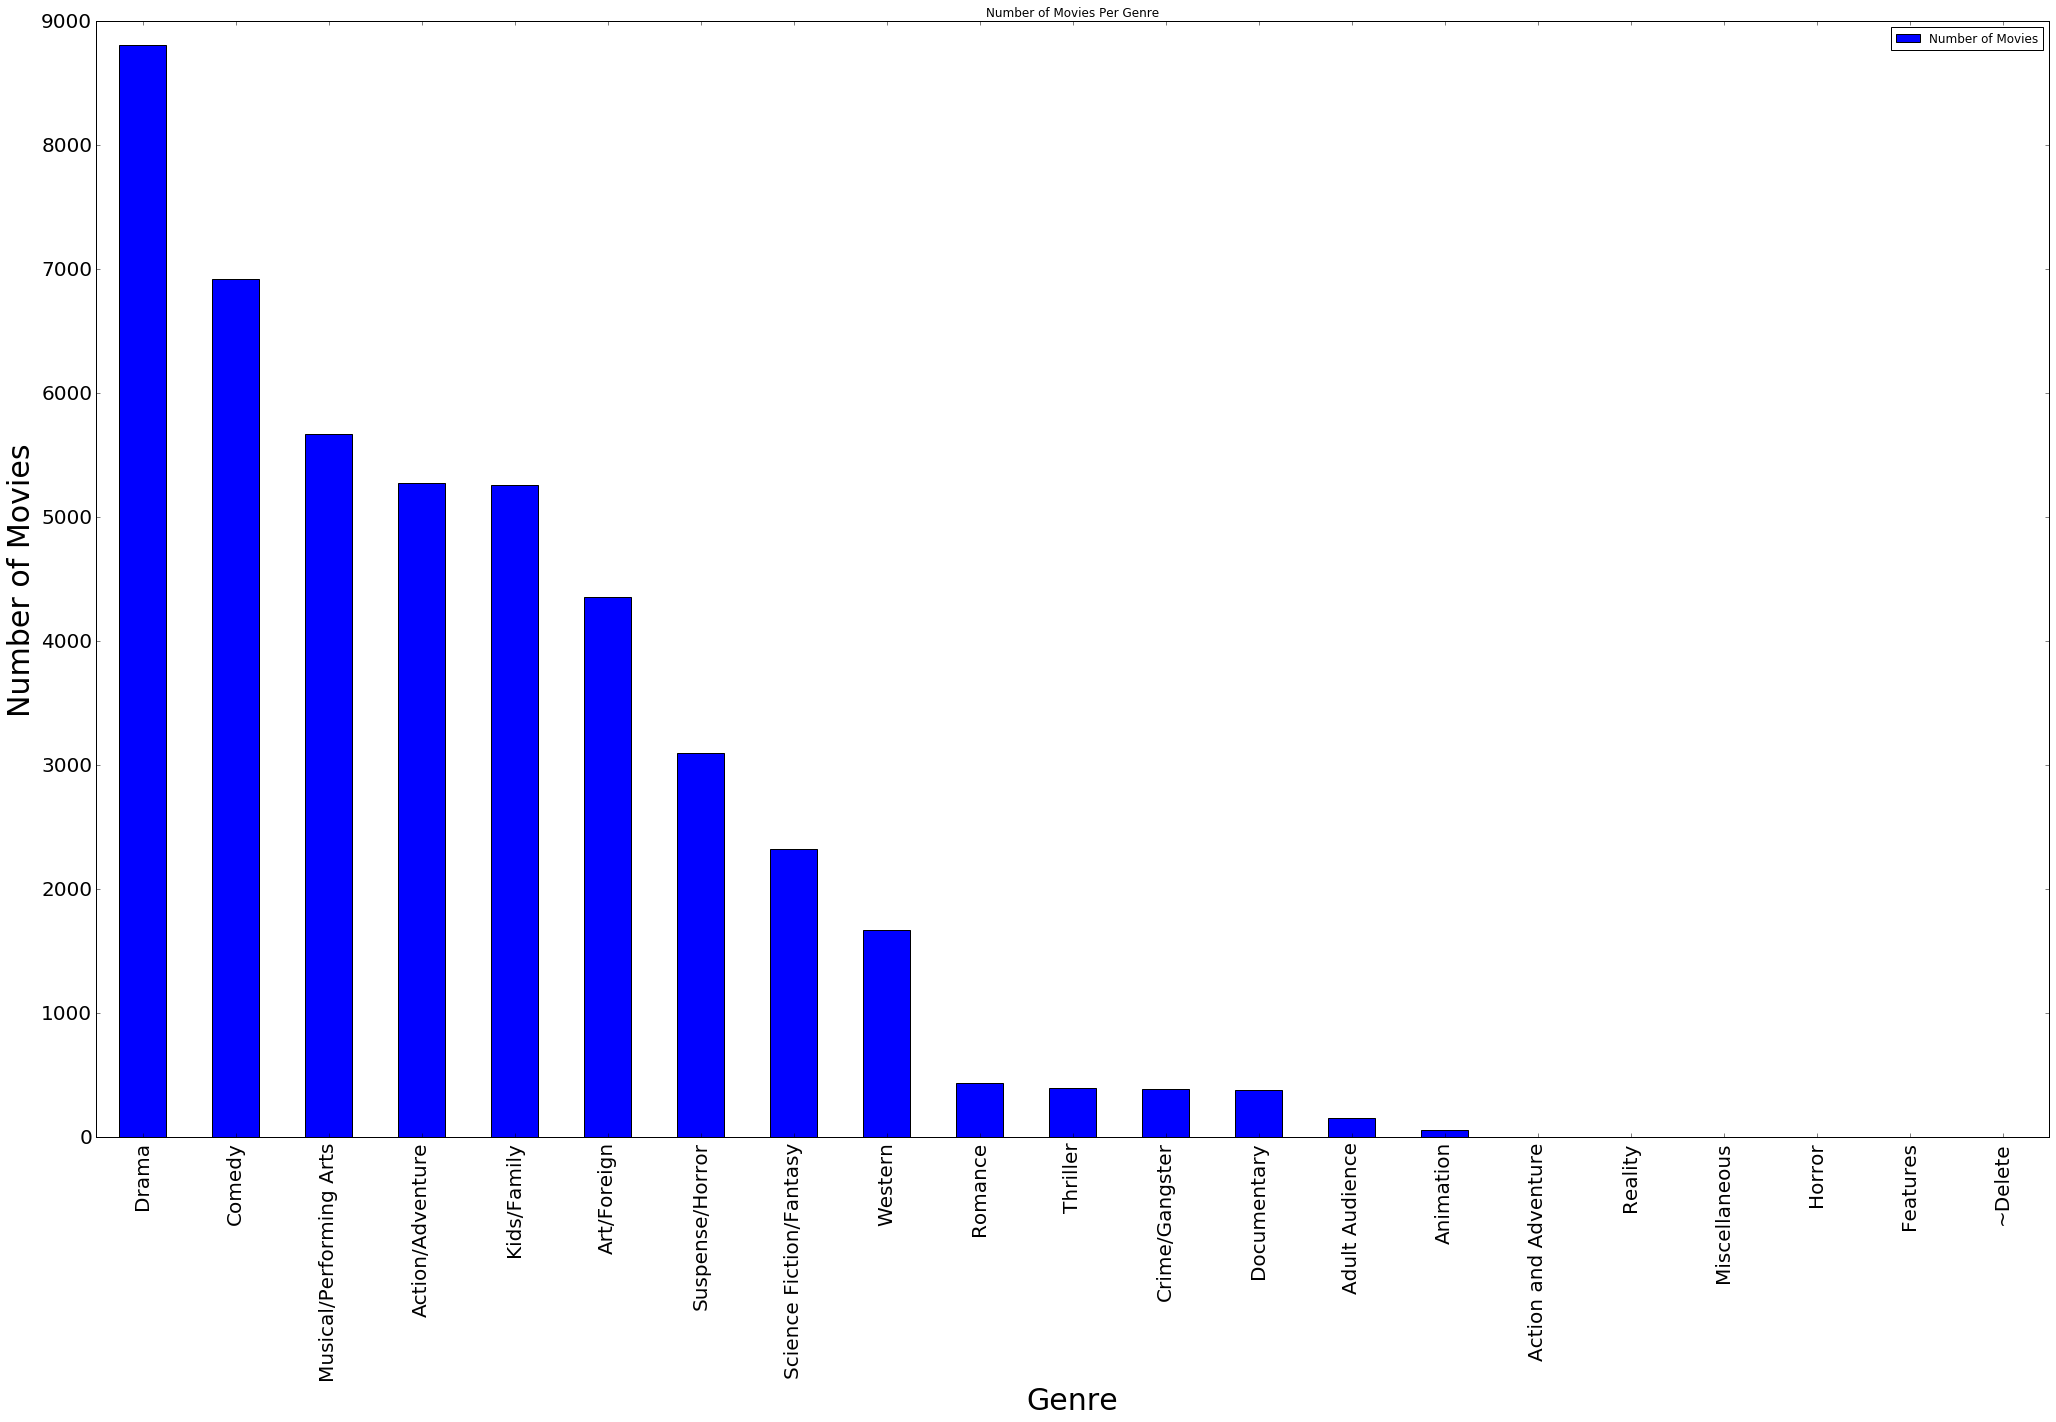

In [350]:
#Checking to see without Special Interest
finalranking = newranking[1:]
franking = finalranking.plot(kind='bar', title = 'Number of Movies Per Genre', figsize = (35,20), legend=True, fontsize=20)
franking.set_xlabel('Genre', fontsize = 30)
franking.set_ylabel('Number of Movies', fontsize = 30)

Based on this graph, the most popular genres are:
1. Drama
2. Comedy
3. Music/Performing Arts
4. Action/Adventure and Kids/Family are tied for fourth
5. Arts/Foreign


Animation is least number. Perhaps it is due to the fact that it is the latest type of movie, a recent genre?

Ratings Analysis

In [11]:
ratingsdata = data[[0, 1, 10, 18, 32, 24]]
ratingsdata.columns = ["Movie ID", "Title", "Genres", "Critic_Ratings", "Yahoo_Ratings", "MovieMom_Ratings"]
ratingsdata.head()

,Movie ID,Title,Genres,Critic_Ratings,Yahoo_Ratings,MovieMom_Ratings
0,1800010969,The 1985 Admiral's Cup (1997),Special Interest,\N,\N,\N
1,1800011786,984 - Prisoner of the Future (1984),Science Fiction/Fantasy,\N,\N,\N
2,1800011850,A's All-Star Almanac (1987),Special Interest,\N,7,\N
3,1800012991,The Adventures of Annie Oakley (1953),Western,\N,6,\N
4,1800013061,The Adventures of Black Beauty 1 (1972),Kids/Family,\N,\N,\N


In [12]:
critic_ratings = ratingsdata[ratingsdata['Critic_Ratings'] != "\\N"]
critic_ratings['Critic_Ratings'] = critic_ratings['Critic_Ratings'].astype(float)
critic_ratings.drop(['Yahoo_Ratings', 'MovieMom_Ratings'], axis=1, inplace=True)

yahoo_ratings = ratingsdata[ratingsdata['Yahoo_Ratings'] != "\\N"]
yahoo_ratings['Yahoo_Ratings'] = yahoo_ratings['Yahoo_Ratings'].astype(float)
yahoo_ratings.drop(['Critic_Ratings', 'MovieMom_Ratings'], axis=1, inplace=True)

moviemom_ratings = ratingsdata[ratingsdata['MovieMom_Ratings'] != "\\N"]
moviemom_ratings['MovieMom_Ratings'] = moviemom_ratings['MovieMom_Ratings'].astype(float)
moviemom_ratings.drop(['Yahoo_Ratings', 'Critic_Ratings'], axis=1, inplace=True)

/Users/joshuapark/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/joshuapark/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/joshuapark/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

First, check to see how many ratings from each forum is available in the dataset.

In [13]:
critic_ratings['Critic_Ratings'].value_counts()

8.00     20
9.00     19
7.00     12
7.50     11
10.00    11
9.40      9
9.67      9
6.00      9
8.60      9
7.40      9
9.50      9
11.40     8
11.00     8
12.00     8
11.80     8
7.67      7
7.80      7
9.33      7
8.75      7
7.60      7
10.60     7
9.29      6
8.40      6
8.50      6
6.67      5
7.33      5
8.33      5
5.00      5
9.60      5
8.29      5
         ..
7.78      1
8.23      1
6.27      1
7.15      1
4.50      1
8.86      1
5.85      1
8.64      1
11.08     1
7.27      1
4.46      1
9.83      1
9.53      1
9.58      1
9.64      1
4.33      1
4.15      1
5.60      1
7.93      1
8.45      1
5.44      1
4.43      1
3.43      1
5.89      1
4.12      1
10.88     1
7.56      1
9.87      1
9.77      1
2.78      1
Name: Critic_Ratings, dtype: int64

In [14]:
len(critic_ratings)

812

In [15]:
yahoo_ratings['Yahoo_Ratings'].value_counts()

13.00    1900
12.00     857
1.00      783
9.00      684
10.00     653
11.00     543
7.00      373
8.00      351
6.00      246
5.00      193
9.50      176
12.50     171
11.50     159
10.50     145
3.00      100
4.00      100
8.50       89
2.00       87
6.50       84
11.33      72
11.67      61
10.33      60
7.50       58
12.67      53
8.67       53
10.67      47
5.50       46
12.33      46
9.67       46
9.33       45
         ... 
9.40        1
11.33       1
7.82        1
9.45        1
10.61       1
10.53       1
10.79       1
9.47        1
11.38       1
10.72       1
6.47        1
9.05        1
9.18        1
12.03       1
7.48        1
11.08       1
8.40        1
9.68        1
9.89        1
10.86       1
12.86       1
7.76        1
10.45       1
9.24        1
9.32        1
11.26       1
11.16       1
8.99        1
10.55       1
9.68        1
Name: Yahoo_Ratings, dtype: int64

In [16]:
len(yahoo_ratings)

11915

In [17]:
moviemom_ratings['MovieMom_Ratings'].value_counts()

8.00     241
5.00     167
2.00     107
11.00     89
9.00      45
7.00      27
10.00     21
4.00      15
6.00      14
0.00      14
1.00       2
3.00       1
Name: MovieMom_Ratings, dtype: int64

In [18]:
len(moviemom_ratings)

743

So there are:
- 812 Critic Ratings
- 11,915 Yahoo Ratings
- 743 Movie Mom Ratings

It also looks like Yahoo raters are more likely to give out a perfect rating (13/13) compared to critics and Movie Mom.

But this accounts for multiple ratings for each movie. Because I want to compare the ratings from the three forums for genre (for now, maybe I can go into movies if given enough data), I need to find average rating per genre from each forum.

In [19]:
critic_ratings.head()

,Movie ID,Title,Genres,Critic_Ratings
61,1800018548,10 Things I Hate About You (1999),Comedy,7.40
65,1800018600,A Perfect Murder (1998),Thriller,6.91
68,1800018623,American Beauty (1999),Comedy|Drama,10.78
69,1800018632,American History X (1998),Drama,8.73
70,1800018639,American Pie (1999),Comedy,8.50


In [20]:
#Finding the average CRITIC ratings per genre.
# 1) Find the critic rating for each movie identified by genre (need to split those with "|")
# 2) Groupby the genre
# 3) Find mean ratings for each genre

a = critic_ratings.Genres.str.split('|').apply(pd.Series,1).stack()
a.index = a.index.droplevel(-1)
df_critic_genres = a.to_frame()
b = pd.concat([df_critic_genres, critic_ratings['Critic_Ratings']], axis=1)
b.columns = ['Genres', 'Rating']
c = b.groupby('Genres')
genre_criticratings = c['Rating'].mean()
genre_criticratings.sort_values(ascending=False)


Genres
Special Interest          10.20
Western                    9.77
Art/Foreign                8.94
Documentary                8.83
Musical/Performing Arts    8.69
Drama                      8.57
\N                         8.47
Kids/Family                8.41
Science Fiction/Fantasy    8.09
Animation                  8.03
Crime/Gangster             7.93
Action/Adventure           7.79
Comedy                     7.77
Thriller                   7.76
Romance                    7.46
Suspense/Horror            7.00
Reality                    5.90
Name: Rating, dtype: float64

In [226]:
?genre_criticratings

In [21]:
#Finding the average YAHOO ratings per genre. Same process as above

x = yahoo_ratings.Genres.str.split('|').apply(pd.Series,1).stack()
x.index = x.index.droplevel(-1)
df_yahoo_genres = x.to_frame()
y = pd.concat([df_yahoo_genres, yahoo_ratings['Yahoo_Ratings']], axis=1)
y.columns = ['Genre', 'Rating']
z = y.groupby('Genre')
genre_yahooratings = z['Rating'].mean()
genre_yahooratings.sort_values(ascending=False)

Genre
Miscellaneous             11.82
Adult Audience            11.50
Art/Foreign                9.78
Western                    9.68
Musical/Performing Arts    9.61
Drama                      9.59
Crime/Gangster             9.44
Romance                    9.37
Kids/Family                9.37
Comedy                     9.31
Science Fiction/Fantasy    9.27
Action/Adventure           9.21
\N                         9.19
Thriller                   9.05
Documentary                9.02
Animation                  8.85
Suspense/Horror            8.46
Special Interest           8.44
Reality                    5.71
Name: Rating, dtype: float64

In [22]:
#Finding the average MOVIE MOM ratings per genre. Same process as above

d = moviemom_ratings.Genres.str.split('|').apply(pd.Series,1).stack()
d.index = d.index.droplevel(-1)
df_moviemom_genres = d.to_frame()
e = pd.concat([df_moviemom_genres, moviemom_ratings['MovieMom_Ratings']], axis=1)
e.columns = ['Genre', 'Rating']
f = e.groupby('Genre')
genre_moviemomratings = f['Rating'].mean()
genre_moviemomratings.sort_values(ascending=False)

Genre
Special Interest          11.00
Western                    8.17
Musical/Performing Arts    7.97
Art/Foreign                7.73
Documentary                7.50
Drama                      7.16
Kids/Family                7.12
\N                         7.11
Science Fiction/Fantasy    6.54
Animation                  6.29
Action/Adventure           6.11
Comedy                     6.02
Crime/Gangster             5.92
Romance                    5.83
Thriller                   5.51
Suspense/Horror            4.48
Reality                    2.00
Name: Rating, dtype: float64

In [110]:
genre_ratings = pd.concat([genre_criticratings, genre_yahooratings, genre_moviemomratings], axis=1)
genre_ratings.columns = ['Critics', 'Yahoo', 'MovieMom']
genre_ratings

,Critics,Yahoo,MovieMom
Action/Adventure,7.79,9.21,6.11
Adult Audience,nan,11.50,nan
Animation,8.03,8.85,6.29
Art/Foreign,8.94,9.78,7.73
Comedy,7.77,9.31,6.02
Crime/Gangster,7.93,9.44,5.92
Documentary,8.83,9.02,7.50
Drama,8.57,9.59,7.16
Kids/Family,8.41,9.37,7.12
Miscellaneous,nan,11.82,nan


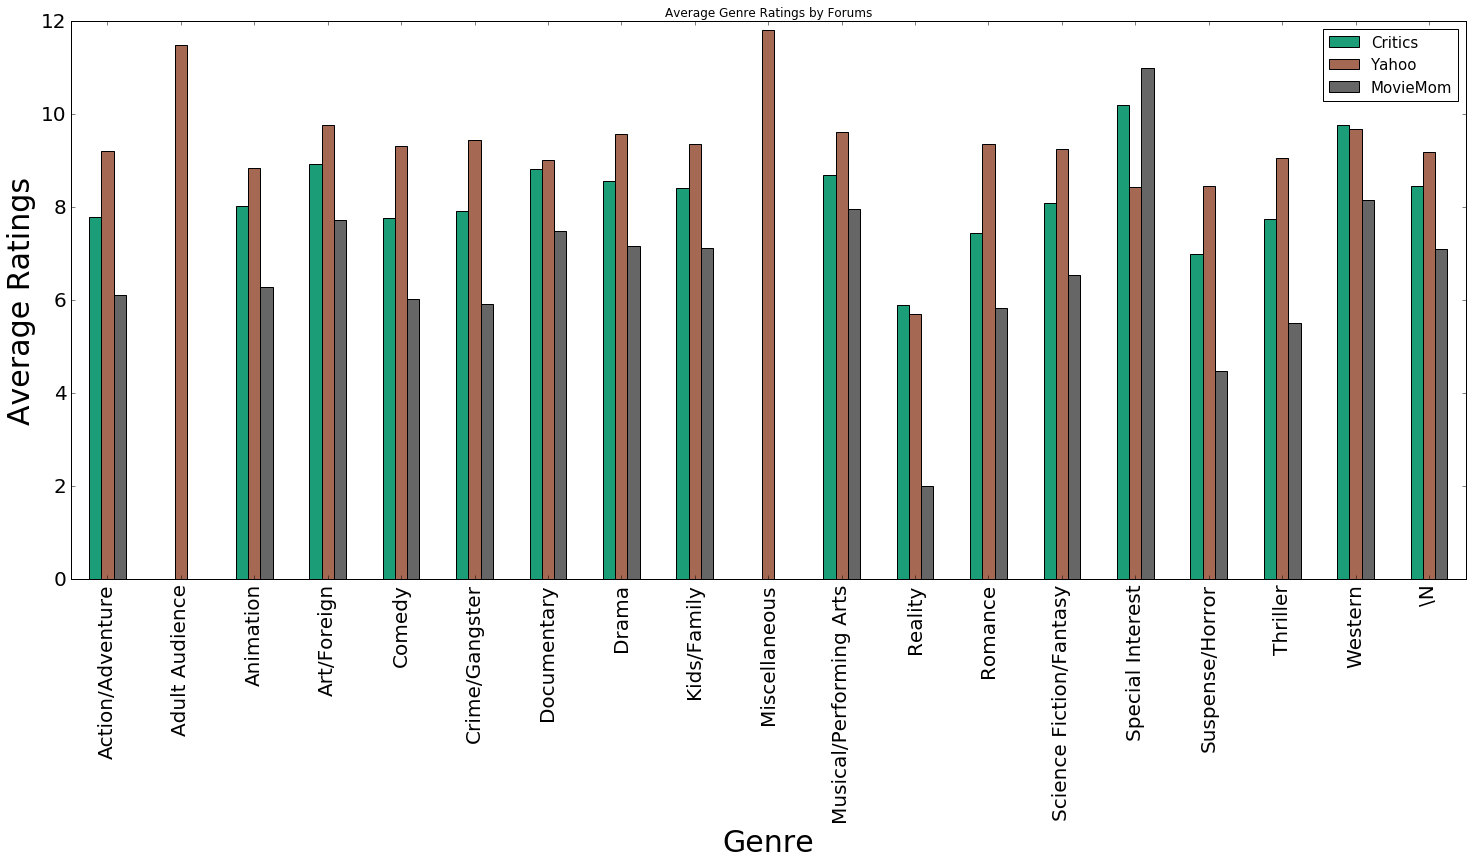

In [111]:
genre_ratings_plot = genre_ratings.plot(kind='bar', title = 'Average Genre Ratings by Forums', figsize=(25,10), legend=True, fontsize=20, colormap='Dark2')
genre_ratings_plot.set_xlabel('Genre', fontsize=30)
genre_ratings_plot.set_ylabel('Average Ratings', fontsize=30)
genre_ratings_plot.legend(prop={'size':15})


#See why Movie mom ratings and see why much lower

In analyzing this figure:

By Genre ratings:
1. Movie Mom raters generally rate lower than raters from the other forums, with the exception of the Special Interest Genre
2. Yahoo raters generally rate higher than raters from the other forums with a few notable genre exceptions such as special Interest, Reality, and Western.

By Forums:
1. Highest Average Rating Genre:
    - Critics: Special Interest
    - Yahoo: Miscellaneous
         - But since there is no data from the other forums for this genre, if we compare based on genres where all 3 forums rated, then the highest is: arts/foreign
    - Movie Mom: Special Interest
2. Lowest Average Rating Genre:
    - Critics: Reality
    - Yahoo: Reality
    - Movie Mom: Reality

Conclusion: No one likes Reality. JK. But it seems that movies from reality genre are less liked by people than other genre movies. This would make sense since Reality is a more popular genre for TV shows and not movies. Most popular genres are miscellaneous and special interest, which are extremely broad categories so this also makes sense given the larger range and diversity of movies included in these genres.

1B: Ratings by Year

What years produced the best rated movies/genres?
data visualization: use scatter plot

In [5]:
yeardf = data[[1, 6, 10, 18, 24, 32]]
yeardf.columns = ['Title', 'Year', 'Genre', 'Critic Rating', 'Movie Mom Rating', 'Yahoo Rating']
yeardf.head()

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
0,The 1985 Admiral's Cup (1997),NaN,Special Interest,\N,\N,\N
1,984 - Prisoner of the Future (1984),NaN,Science Fiction/Fantasy,\N,\N,\N
2,A's All-Star Almanac (1987),NaN,Special Interest,\N,\N,7
3,The Adventures of Annie Oakley (1953),NaN,Western,\N,\N,6
4,The Adventures of Black Beauty 1 (1972),NaN,Kids/Family,\N,\N,\N


In [6]:
#Release year of movie is in the title so we're going to transport the data into the column 'Year'

def year(s):
    if "(" and ")" in s:
        year = s[s.index("(")+1:s.index(")")]
    else:
        year = 5
    return year

yeardf["Year"] = yeardf['Title'].apply(year)

/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# Data Cleaning - release year
yeardf[yeardf['Year'] == "Documentary"].index.tolist()
yeardf[yeardf['Year'] == "documentary"].index.tolist()

[235]

In [8]:
# Data Cleaning - release year
yeardf.Title[98477]
yeardf.Title[235]

'The Mummy (documentary) (1999)'

In [9]:
# Data Cleaning - release year
yeardf.Year[98477] = 2001
yeardf.Year[235] = 1999

/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# Convert release year from str to int.
def Int(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def r_year(val):
    if Int(val) == True:
        val = int(val)
    else:
        val = int(5)
    return val

yeardf['Year'] = yeardf['Year'].apply(r_year)

/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [118]:
#Clean title
#Take out years from title since we have it in column 'Year'

import re
def title(s):
    regex = re.compile('\(.+?\)')
    output = regex.sub('', s)
    return output

yeardf["Title"] = yeardf['Title'].apply(title)

/Users/joshuapark/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
yeardf.head()

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
0,The 1985 Admiral's Cup,1997,Special Interest,\N,\N,\N
1,984 - Prisoner of the Future,1984,Science Fiction/Fantasy,\N,\N,\N
2,A's All-Star Almanac,1987,Special Interest,\N,\N,7
3,The Adventures of Annie Oakley,1953,Western,\N,\N,6
4,The Adventures of Black Beauty 1,1972,Kids/Family,\N,\N,\N


Data Exploration

- How many movies from each year?

In [379]:
yeardf.groupby('Year')
yearmovie = yeardf.Year.value_counts()

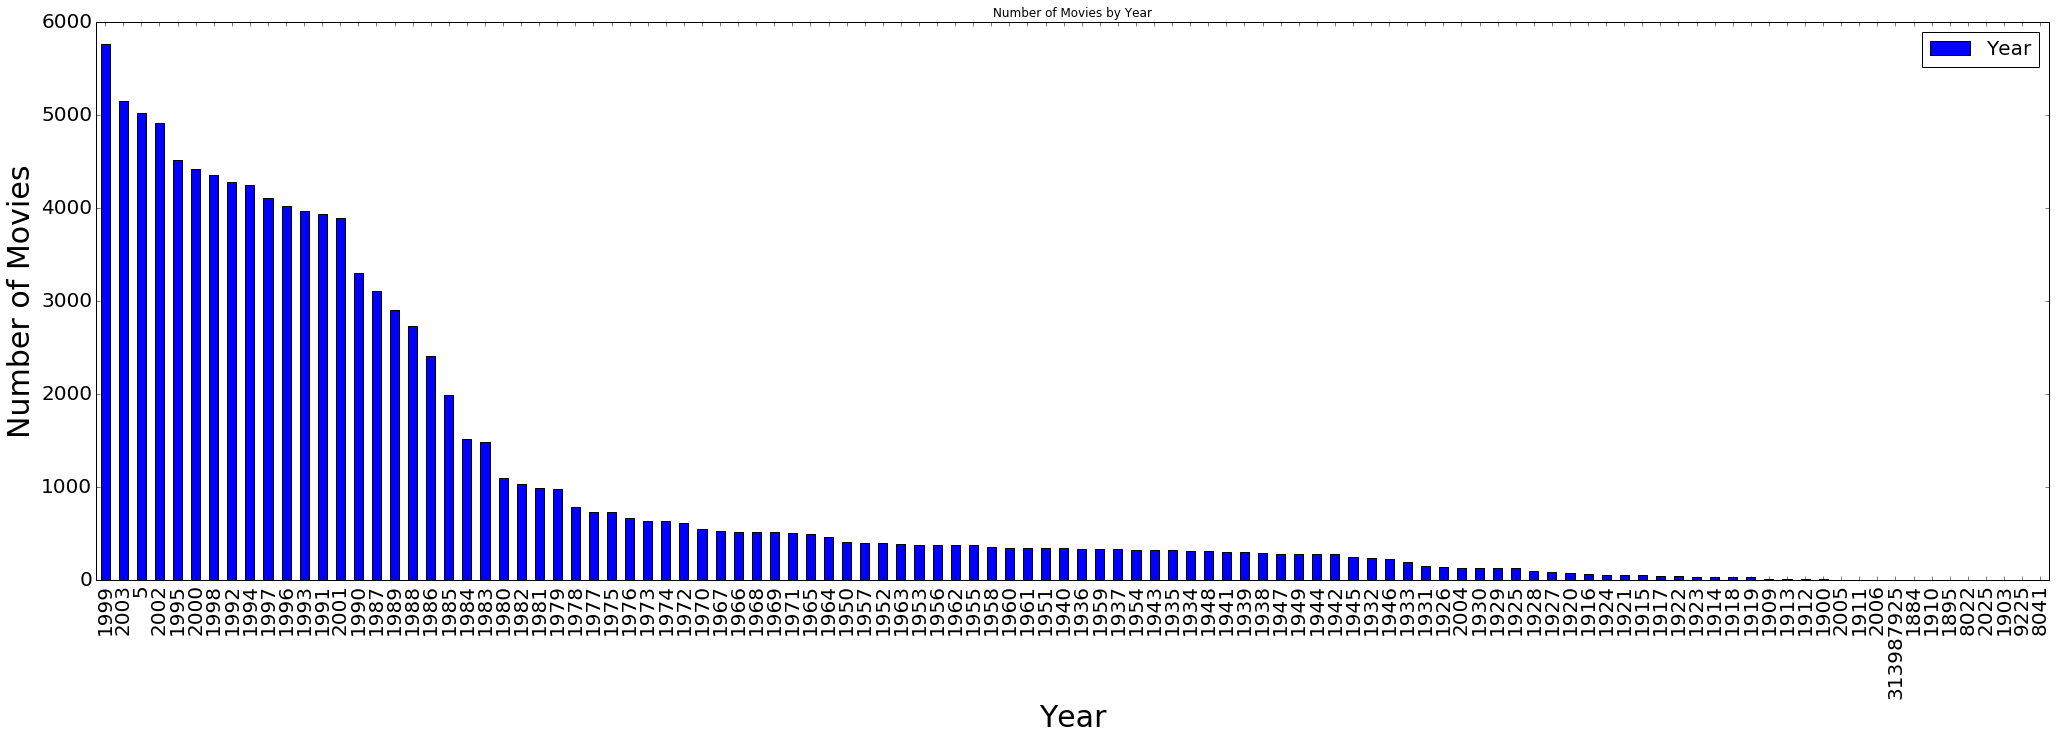

In [382]:
#yearmovie = yeardf.Year.value_counts()
yrplot = yearmovie.plot(kind='bar', title = 'Number of Movies by Year', figsize = (35,10), legend=True, fontsize=20)
yrplot.set_xlabel('Year', fontsize=30)
yrplot.set_ylabel('Number of Movies', fontsize=30)
yrplot.legend(prop={'size': 20})

Observations:
1. There are 5,023 movies that do not have a release year documented. That's around 5% of the movies we have.
2. Interestingly, there is one movie that has a release date of "10." Need to look into this. See below.
3. There is movie with the release date with 313987925 
4. There are movies with the release dates 9225, 2025, 8022, 8041. I need to clean all of this. 
5. I will keep those that are older because there might be critic ratings that have been documented for these movies

In [121]:
#Groupby year 
# Problem: There are some columns with 10 as the year, verify
any(yeardf.Year == 10)

True

In [122]:
#Find what the movie is
yeardf.loc[yeardf.Year == 10]

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
77018,Intimate Portrait - Jacqueline Bisset,10,\N,\N,\N,\N


After doing some research, it seems this movie is a specific movie in a documentary series called Intimate Portrait. This particular portrait focuses on Jacqueline Bisset, a famous actress. However, no indication of what the '10' stands for. But the movie was released in 1998.

In [123]:
yeardf.Year.replace([10], [1998], inplace=True)

/Users/joshuapark/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [124]:
yeardf.Year[77018]

1998

In [125]:
yeardf.Year.value_counts()

1999         5759
2003         5149
5            5023
2002         4918
1995         4512
2000         4424
1998         4355
1992         4276
1994         4243
1997         4111
1996         4024
1993         3966
1991         3936
2001         3896
1990         3303
1987         3110
1989         2901
1988         2733
1986         2409
1985         1990
1984         1515
1983         1482
1980         1097
1982         1036
1981          993
1979          981
1978          786
1977          734
1975          732
1976          665
             ... 
1925          125
1928           94
1927           90
1920           78
1916           68
1924           59
1921           58
1915           53
1917           40
1922           40
1923           37
1914           37
1918           35
1919           33
1909           10
1913            9
1912            9
1900            7
2005            5
1911            4
2006            2
313987925       1
1884            1
1910            1
1895      

In [126]:
#Cleaning up the data with the 313987925 movie
yeardf.loc[yeardf.Year == 313987925]

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
92905,Madeline at the Eiffel Tower,313987925,\N,\N,\N,\N


In [127]:
newdf = yeardf.drop(yeardf.index[92905])

In [128]:
newdf.Year.value_counts()

1999    5759
2003    5149
5       5023
2002    4918
1995    4512
2000    4424
1998    4355
1992    4276
1994    4243
1997    4111
1996    4024
1993    3966
1991    3936
2001    3896
1990    3303
1987    3110
1989    2901
1988    2733
1986    2409
1985    1990
1984    1515
1983    1482
1980    1097
1982    1036
1981     993
1979     981
1978     786
1977     734
1975     732
1976     665
        ... 
1929     127
1925     125
1928      94
1927      90
1920      78
1916      68
1924      59
1921      58
1915      53
1917      40
1922      40
1923      37
1914      37
1918      35
1919      33
1909      10
1913       9
1912       9
1900       7
2005       5
1911       4
2006       2
8041       1
2025       1
1910       1
1884       1
1895       1
8022       1
9225       1
1903       1
Name: Year, dtype: int64

In [129]:
newdf.loc[yeardf.Year == 2025]

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
103638,Legend Of The White Crane,2025,\N,\N,\N,\N


In [130]:
newdf.Year.replace([2025], [2003], inplace=True)

In [131]:
newdf.Year[103638]

2003

In [132]:
newdf.Year.value_counts()

1999    5759
2003    5150
5       5023
2002    4918
1995    4512
2000    4424
1998    4355
1992    4276
1994    4243
1997    4111
1996    4024
1993    3966
1991    3936
2001    3896
1990    3303
1987    3110
1989    2901
1988    2733
1986    2409
1985    1990
1984    1515
1983    1482
1980    1097
1982    1036
1981     993
1979     981
1978     786
1977     734
1975     732
1976     665
        ... 
1930     128
1929     127
1925     125
1928      94
1927      90
1920      78
1916      68
1924      59
1921      58
1915      53
1917      40
1922      40
1914      37
1923      37
1918      35
1919      33
1909      10
1912       9
1913       9
1900       7
2005       5
1911       4
2006       2
8041       1
8022       1
9225       1
1884       1
1903       1
1895       1
1910       1
Name: Year, dtype: int64

In [133]:
newdf.loc[yeardf.Year == 9225]

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
89212,Roy Rogers - Bells of San Angelo/Heldorado,9225,\N,\N,\N,\N


In [134]:
newdf.Year.replace([9225], [1947], inplace=True)

In [135]:
newdf.Year.value_counts()

1999    5759
2003    5150
5       5023
2002    4918
1995    4512
2000    4424
1998    4355
1992    4276
1994    4243
1997    4111
1996    4024
1993    3966
1991    3936
2001    3896
1990    3303
1987    3110
1989    2901
1988    2733
1986    2409
1985    1990
1984    1515
1983    1482
1980    1097
1982    1036
1981     993
1979     981
1978     786
1977     734
1975     732
1976     665
        ... 
2004     131
1930     128
1929     127
1925     125
1928      94
1927      90
1920      78
1916      68
1924      59
1921      58
1915      53
1917      40
1922      40
1923      37
1914      37
1918      35
1919      33
1909      10
1912       9
1913       9
1900       7
2005       5
1911       4
2006       2
1884       1
1910       1
8022       1
1903       1
8041       1
1895       1
Name: Year, dtype: int64

In [230]:
newdf.loc[yeardf.Year == 1895]

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
10969,Pioneer Cinema,1895,Special Interest,\N,\N,\N


In [235]:
#Pioneer Cinema isn't a movie. WHy is this here?? UGH

newa = newdf[newdf['Year'] > 1970]

In [236]:
newa.Year.value_counts()

1999    5759
2003    5150
2002    4918
1995    4512
2000    4424
1998    4355
1992    4276
1994    4243
1997    4111
1996    4024
1993    3966
1991    3936
2001    3896
1990    3303
1987    3110
1989    2901
1988    2733
1986    2409
1985    1990
1984    1515
1983    1482
1980    1097
1982    1036
1981     993
1979     981
1978     786
1977     734
1975     732
1976     665
1973     638
1974     636
1972     614
1971     508
2004     131
2005       5
2006       2
8041       1
8022       1
Name: Year, dtype: int64

In [237]:
newyear = newa[newa['Year'] < 2005]

In [238]:
newyear.Year.value_counts()

1999    5759
2003    5150
2002    4918
1995    4512
2000    4424
1998    4355
1992    4276
1994    4243
1997    4111
1996    4024
1993    3966
1991    3936
2001    3896
1990    3303
1987    3110
1989    2901
1988    2733
1986    2409
1985    1990
1984    1515
1983    1482
1980    1097
1982    1036
1981     993
1979     981
1978     786
1977     734
1975     732
1976     665
1973     638
1974     636
1972     614
1971     508
2004     131
Name: Year, dtype: int64

In [244]:
newyear.head()

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating
0,The 1985 Admiral's Cup,1997,Special Interest,\N,\N,\N
1,984 - Prisoner of the Future,1984,Science Fiction/Fantasy,\N,\N,\N
2,A's All-Star Almanac,1987,Special Interest,\N,\N,7
4,The Adventures of Black Beauty 1,1972,Kids/Family,\N,\N,\N
5,The Adventures of Black Beauty 2,1972,Kids/Family,\N,\N,\N


For the movie rating based on year, we will use the following protocol:
1. Yahoo Rating is priority
2. If Yahoo Rating doesn't exist, we use Critic Rating
3. Movie Mom rating is last option because we know they are harsher raters
4. If no ratings exist, we will delete the movie from the dataset

In [246]:
import numpy as np
def rating(row):
    if row['Yahoo Rating'] != r'\N':
        return row['Yahoo Rating']
    if row['Critic Rating'] != r'\N':
        return row['Critic Rating']
    if row['Movie Mom Rating'] != r'\N':
        return row['Movie Mom Rating']
    return np.nan
    
newyear['Rating'] = newyear.apply(rating, axis = 1)

/Users/joshuapark/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [247]:
newyear.head()

,Title,Year,Genre,Critic Rating,Movie Mom Rating,Yahoo Rating,Rating
0,The 1985 Admiral's Cup,1997,Special Interest,\N,\N,\N,NaN
1,984 - Prisoner of the Future,1984,Science Fiction/Fantasy,\N,\N,\N,NaN
2,A's All-Star Almanac,1987,Special Interest,\N,\N,7,7
4,The Adventures of Black Beauty 1,1972,Kids/Family,\N,\N,\N,NaN
5,The Adventures of Black Beauty 2,1972,Kids/Family,\N,\N,\N,NaN


In [275]:
yranalysis = newyear[[1, 6]]
yranalysis.columns = ['Year', 'Rating']
yranalysis.head()

,Year,Rating
0,1997,NaN
1,1984,NaN
2,1987,7
4,1972,NaN
5,1972,NaN


In [278]:
yranalysis = yranalysis[pd.notnull(yranalysis['Rating'])]

In [291]:
yranalysis.head()

,Year,Rating
2,1987,7
24,1985,13
61,1999,10.64137931
62,1999,5
63,1999,9.022727273


In [301]:
yranalysis['Rating'] = yranalysis['Rating'].astype(float)

In [323]:
#Sort by year
#Find average rating

yeargroup = yranalysis['Rating'].groupby(yranalysis['Year'])
yearavg = yeargroup.mean()
#yearlook = yearavg.sort_values(ascending=False)
yearlook = yearavg.to_frame()
yearlook


,Rating
Year,
1971,9.10
1972,8.70
1973,9.24
1974,9.25
1975,9.78
1976,9.60
1977,9.42
1978,9.19
1979,9.41


(8, 11)

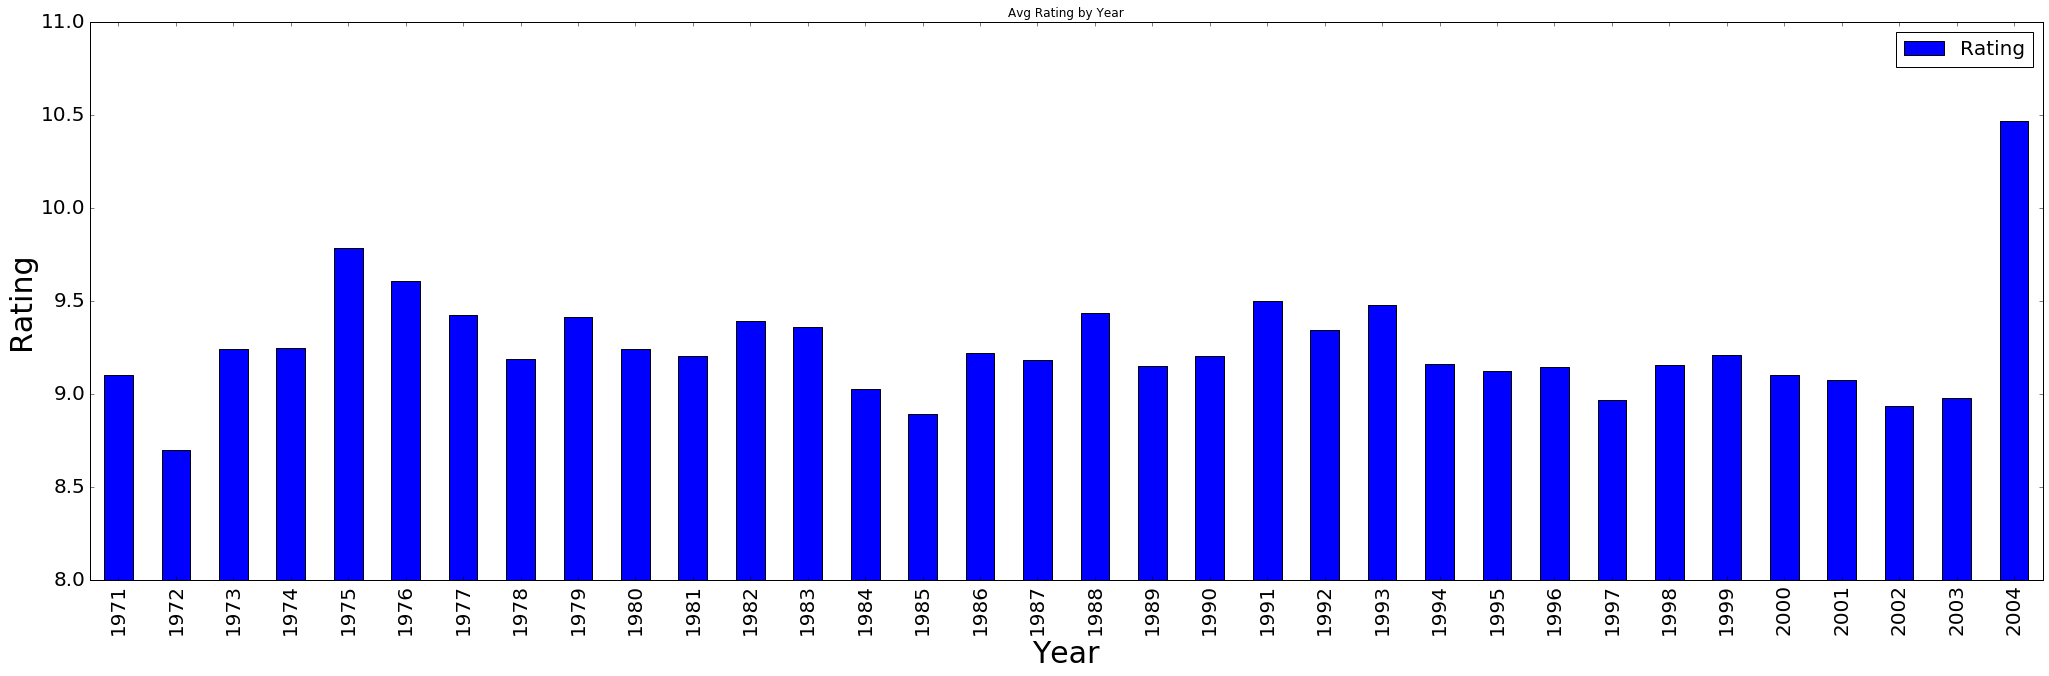

In [336]:
yearplot = yearlook.plot(kind='bar', title = 'Avg Rating by Year', figsize =(35,10), legend=True, fontsize=20)
yearplot.set_xlabel('Year', fontsize=30)
yearplot.set_ylabel('Rating', fontsize=30)
yearplot.legend(prop={'size': 20})
yearplot.set_ylim(8,11)

Observations:
1. 2004 had the highest rated movies with 10.47. What movies were produced then?
2. 1975 had the second highest rated movies with 9.78.
3. There is a trend where every 4-5 years, the movies seem to gain ratings. Then after that peak, the ratings slowly drop back down until the next fourth year. 

Overall, these ratings are very similar. Most of them are within the 9-10 range so there isn't TOO much variety between the years.

Rater Information Analysis

In [65]:
rater.columns =['user_id', "b_year","gender"]
# Convert user birth year from str to int
def b_year(val):
    if val != "undef":
        val = int(val)
    else:
        val = "undef"
    return val

rater['b_year'] = rater['b_year'].apply(b_year)
rating.columns = ['user_id',"ID","rating","convert_r"]

Dataset Cleaning

In [66]:
Data = data[[0, 1, 3, 4, 6, 10, 18, 20, 21, 24, 32]]
Data.columns = ['ID', 'Title', 'Length', 'MPAA Rating', 'Release Date', 'Genres', 'Avg. Critic Ratings',
                  '# of Awards won', '# of awards nomination', 'Movie Mom Rating', 'Avg. Training Rating']

In [67]:
Data["release_year"] = Data['Title'].apply(year)

# Data Cleaning - release year
Data[Data['release_year'] == "Documentary"].index.tolist()
Data[Data['release_year'] == "documentary"].index.tolist()
# Data Cleaning - release year: get index
Data.Title[98477]
Data.Title[235]
# Data Cleaning - release year
Data.release_year[98477] = 2001
Data.release_year[235] = 1999

/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_ob

In [68]:
Data['release_year'] = Data['release_year'].apply(r_year)

/Users/zhichaoyang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Combine the three datasets for analysis.

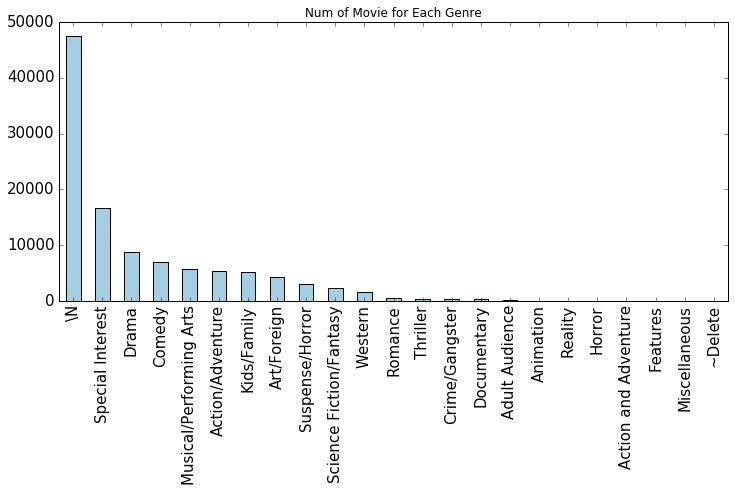

In [69]:
GEN = pd.DataFrame(Data['Genres'].str.split('|').tolist(), index=Data['Avg. Training Rating']).stack()
GEN = GEN.reset_index()[[0, 'Avg. Training Rating']]  
GEN.columns = ['Genres', 'Avg_Rating']

GENgraph = GEN.Genres.value_counts()
GENgraph.plot(kind = "bar", title = "Num of Movie for Each Genre", colormap = "Paired", figsize =(12,5), fontsize = 15)

In [70]:
User = rater.join(rating.set_index('user_id'), on = 'user_id', how = 'inner')
User = User[[3,0,1,2,4,5]]
Combined_user = GR.merge(User,how='left', left_on='ID', right_on='ID')

In [75]:
# Number of raters for each genre
NR = Combined_user.groupby("Genres_x")
NR2 = NR['user_id'].count()
NR2.sort_values(ascending = False)

Genres_x
Comedy                     69147
Action/Adventure           65824
Drama                      51841
Thriller                   32401
Science Fiction/Fantasy    31112
Crime/Gangster             24636
Romance                    18544
Kids/Family                17537
\N                         14785
Suspense/Horror            14371
Animation                   7061
Art/Foreign                 5577
Musical/Performing Arts     5443
Western                     1808
Documentary                  975
Special Interest             423
Reality                       49
Adult Audience                13
Miscellaneous                 11
~Delete                        0
Features                       0
Horror                         0
Action and Adventure           0
Name: user_id, dtype: int64

Although there are many special interest movie, but comedy movies got the largest amount of rating. Possible reason is that comeday is a neutral type of genre for all movie viewers. Movie release year might affect the number of rating as well.

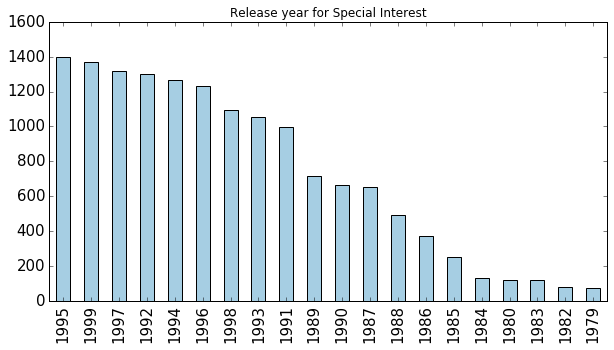

In [73]:
SI = Combined_user[Combined_user.Genres_x == "Special Interest"]
#Data Cleaning
SI = SI[SI.release_year > 1000]
SI2 = SI.release_year.value_counts()
SI2_fig = SI2[0:20].plot(kind = "bar", figsize =(10,5), colormap = "Paired", title = "Release year for Special Interest",
                        fontsize = 15)

Most of the speceial interest movies were relased before year 2000.

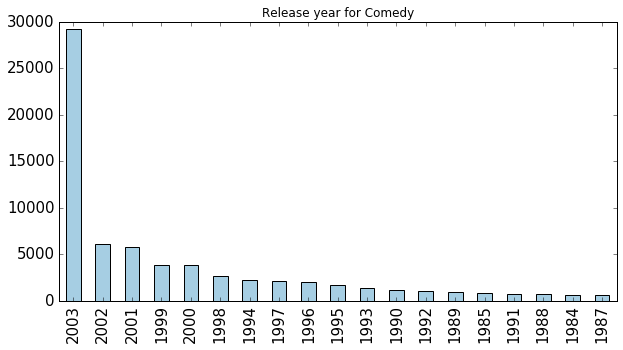

In [74]:
SI3 = Combined_user[Combined_user.Genres_x == "Comedy"]
SI4 = SI3.release_year.value_counts()
SI4[0:19].plot(kind = "bar", figsize =(10,5),colormap = "Paired", title = "Release year for Comedy",
                        fontsize = 15)

Most of Comedy were relased in 2003 and early 20s. Since Yahoo movie was started in 2003 and the Internet bacame popular in late 90s, more raters appeared in late 90s. Therefore, it was possible that those recently released movies got more ratings.

In [58]:
RatingG = Combined_user
RatingG["count"] = 1
gg = RatingG.pivot_table(values ='count', index=['Genres_x'],
                    columns=['gender'], aggfunc= "sum")
# Data cleaning and calculation for number of rating for each genre by gender.
gg['male'] = gg.m
gg['female'] = gg.F + gg.f
gg = gg[[4,5]]
gg['total'] = gg.male.fillna(0) + gg.female.fillna(0)
# percentage of ratings from male raters.
gg['male_percent'] = (gg.male/gg.total) * 100
gg.sort_values(by = "male_percent", ascending = True)

gender,male,female,total,male_percent
Genres_x,,,,
Romance,"12,209.00","6,298.00","18,507.00",65.97
Kids/Family,"12,071.00","5,416.00","17,487.00",69.03
Comedy,"49,385.00","19,597.00","68,982.00",71.59
Drama,"38,477.00","13,248.00","51,725.00",74.39
Crime/Gangster,"18,787.00","5,791.00","24,578.00",76.44
Suspense/Horror,"11,061.00","3,288.00","14,349.00",77.09
Action/Adventure,"51,356.00","14,260.00","65,616.00",78.27
Thriller,"25,391.00","6,910.00","32,301.00",78.61
Science Fiction/Fantasy,"25,061.00","5,951.00","31,012.00",80.81


Romance movies has the highest percentage of ratings from female while Science Fiction/Fantasy has a relative lower percentage of female rating.

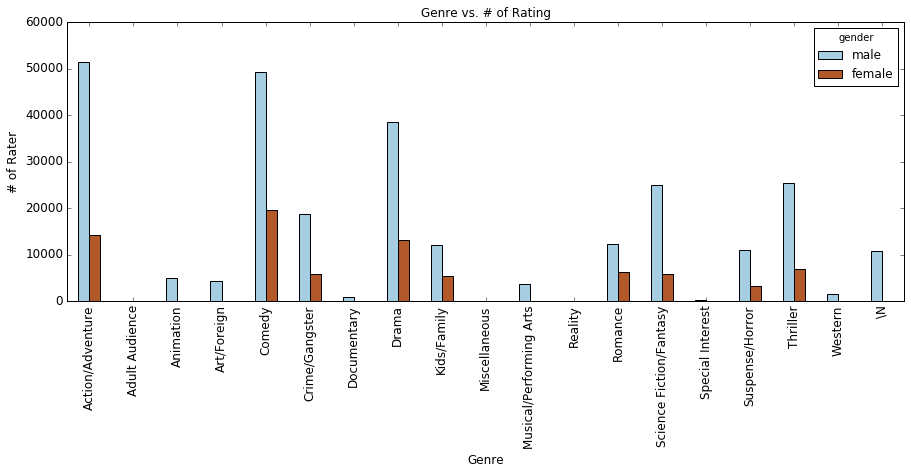

In [59]:
ax1 = gg[['male','female']].plot(kind='bar', title ="Genre vs. # of Rating",figsize=(15,5),legend=True, fontsize=12, 
                                 colormap='Paired')
ax1.set_xlabel("Genre",fontsize=12)
ax1.set_ylabel("# of Rater",fontsize=12)
plt.show()

 Correlation between MPAA rating and gender

In [61]:
MPAAG = Combined_user
MPAAG["count"] = 1
RG = MPAAG.pivot_table(values ='count', index=['MPAA Rating'],
                    columns=['gender'], aggfunc= "sum")
RG['male'] = RG.m
RG['female'] = RG.F + RG.f
RG = RG[[4,5]]
RG['total'] = RG.male.fillna(0) + RG.female.fillna(0)
# Calculation of percentage of rating from male raters.
RG['male_percent'] = (RG.male/RG.total) * 100
# Combine subcatories under rating R, PG, and PG-13.
lst = [11,12,13,14,15,16,17,18]
RG1 = RG.ix[lst]
RG3 = RG.ix[[4,5,6]]
RG4 = RG.ix[[7,8,9,10]]
RG2 = RG.ix[[0,1,2,3,4,7,11,19,20]]
RG2.ix[6].male = sum(RG1.male)
RG2.ix[6].total = sum(RG1.total)
RG2.ix[6].male_percent = (RG2.ix[6].male / RG2.ix[6].total)*100
RG2.ix[4].male = sum(RG3.male)
RG2.ix[4].total = sum(RG3.total)
RG2.ix[5].male = sum(RG4.male)
RG2.ix[5].female = RG.female.ix[7] + RG.female.ix[8]
RG2.ix[5].total = sum(RG4.total)
RG2 = RG2.ix[[0,1,4,5,6]]
RG2.sort_values(by = "total", ascending = False)

gender,male,female,total,male_percent
MPAA Rating,,,,
PG-13,"109,956.00","41,306.00","151,262.00",72.70
R,"100,977.00","27,291.00","128,268.00",78.72
PG,"35,690.00","12,904.00","48,594.00",73.40
G,"13,500.00","5,213.00","18,713.00",72.14
NC-17,107.00,nan,107.00,100.00


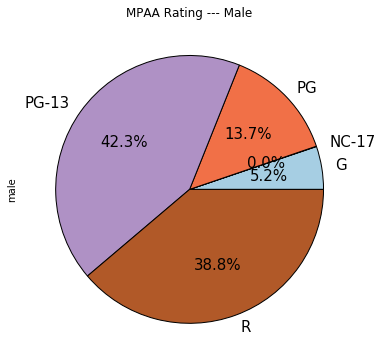

In [62]:
RG2.male.plot.pie(figsize=(6, 6), colormap='Paired', fontsize =15, title = "MPAA Rating --- Male", autopct="%1.1f%%")

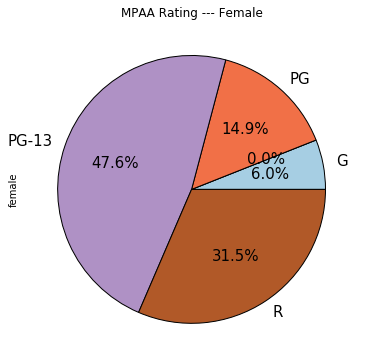

In [63]:
RG2.female.plot.pie(figsize=(6, 6), colormap='Paired', autopct="%1.1f%%", title = "MPAA Rating --- Female", fontsize =15)